# Welcome to the Dask ML Tutorial Session in Domino!

## Contents of this notebook
This notebook aims to benchmark training under two conditions for the same problem. Below are the expected benchmarks, assuming a Dask cluster with 3 workers and a Hardware Tier selection with 1 core and 4GB RAM for all components.
1. Compute k-means clustering on some synthetic data without Dask - 45s
2. Do the same computation using Dask ML on Domino On-Demand cluster nodes - 19s

The Dask example was taken from https://examples.dask.org/machine-learning.html.

## 1. Let's get started WITHOUT Dask

In [1]:
import time
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

Total training time: 45.5 s


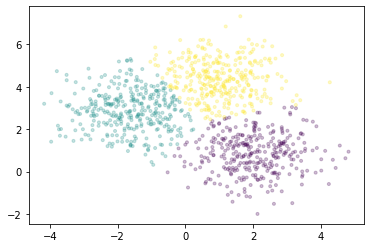

In [2]:
X, y = datasets.make_blobs(n_samples=10000000,
                                   #chunks=1000000,
                                   random_state=0,
                                   centers=3)

t0 = time.time()
km = cluster.KMeans(n_clusters=3)
km.fit(X)
t1 = time.time()

total1 = t1-t0

print(f"Total training time: {round(total1,1)} s")

fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);

## 2. Dask for Machine Learning on Domino On-demand Clusters

In [3]:
from dask.distributed import Client
import os

service_host = os.environ["DASK_SCHEDULER_SERVICE_HOST"]
service_port = os.environ["DASK_SCHEDULER_SERVICE_PORT"]
client = Client(address=f"{service_host}:{service_port}")

# you should now be connected to the cluster
# Dashboard link from the client object is clickable but will not route in Domino
# Use the embedded Dask Web UI tab instead

# You can also expand the "Scheduler Info" in the client object to see some cluster information
client

<Client: 'tcp://10.0.44.9:8786' processes=3 threads=3, memory=12.00 GiB>

In [4]:
import time
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt
%matplotlib inline

Total training time: 18.8 s


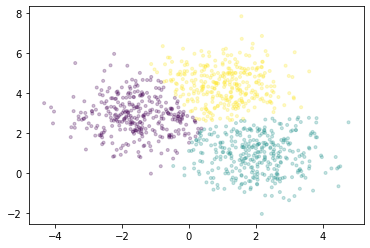

In [5]:
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)

X = X.persist()

t0 = time.time()
km = dask_ml.cluster.KMeans(init='k-means||', n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)
t1 = time.time()

total3 = t1-t0

print(f"Total training time: {round(total3,1)} s")


fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);

## Further Reading

This is a high-level overview demonstrating some the components of Dask-ML.
Visit the main [Dask-ML](http://ml.dask.org) documentation, see the [dask tutorial](https://github.com/dask/dask-tutorial) notebook 08, or explore some of the other machine-learning examples from [here](https://examples.dask.org/machine-learning.html).